### Naive Bayes Classifier

* Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.

* It is mainly used in text classification that includes a high-dimensional training dataset.

* Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.

* It is a probabilistic classifier, which means it predicts on the basis of the probability of an object.

* Some popular examples of Naïve Bayes Algorithm are spam filtration, Sentimental analysis, and classifying articles.

### Why is it called Naïve Bayes?

* Naïve: It is called Naïve because it assumes that the occurrence of a certain feature is independent of the occurrence of other features. Such as if the fruit is identified on the bases of color, shape, and taste, then red, spherical, and sweet fruit is recognized as an apple. Hence each feature individually contributes to identify that it is an apple without depending on each other.

* Bayes: It is called Bayes because it depends on the principle of Bayes' Theorem.


### Bayes' Theorem:

* Bayes' theorem is also known as Bayes' Rule or Bayes' law, which is used to determine the probability of a hypothesis with prior knowledge. It depends on the conditional probability.

* The formula for Bayes' theorem is given as:

  P(A/B) = P(B/A)*P(A) / P(B)
  



### PreProcessing

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [20]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


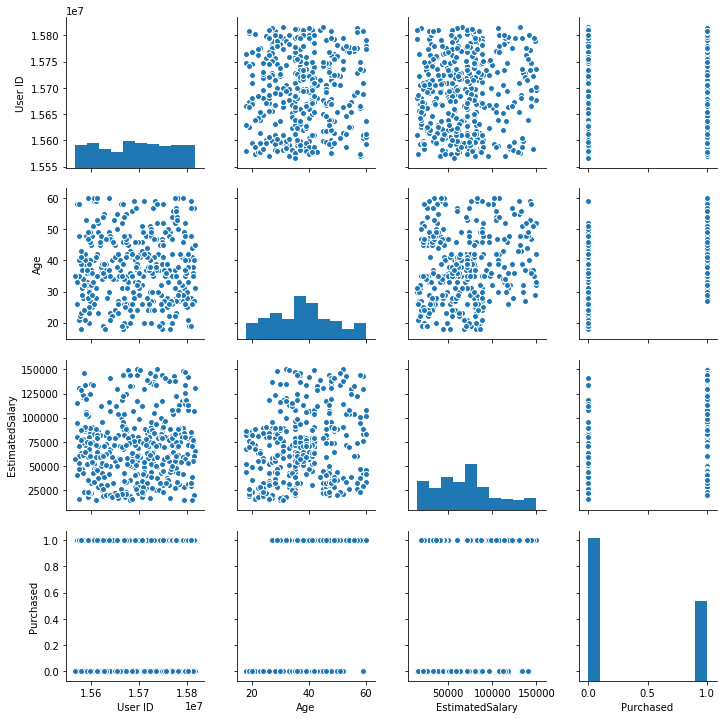

In [33]:
sns.pairplot(data)

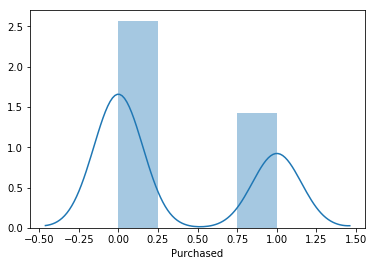

In [35]:
sns.distplot(data['Purchased'])

In [36]:
data.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


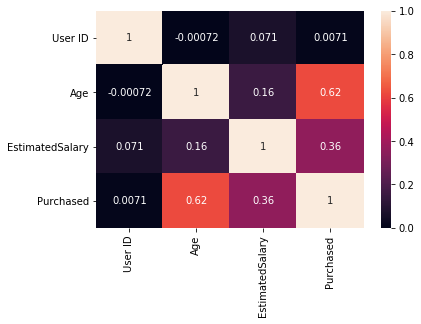

In [37]:
sns.heatmap(data.corr(),annot = True)

In [10]:
x = data.iloc[:,[2,3]].values
y = data.iloc[:,[4]].values

### Splitting the dataset into training and test sets

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [38]:
# Feature Scaling
 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)   

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [42]:
pd.DataFrame(x_train).head()

,0,1
0,1.892589,1.521894
1,0.125038,0.032132
2,0.910616,-1.311575
3,-1.347922,-1.486841
4,-0.169554,-0.581299


In [44]:
# Fitting the Naive Bayes to the Training dataset

from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()

classifier.fit(x_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None)

In [46]:
# Prediction of the test dataset result

y_pred = classifier.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [65]:
y_test.transpose()

array([[0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1]], dtype=int64)

### Now we will check the accuracy of the Naive Bayes classifier using the Confusion matrix

In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[62,  1],
       [ 5, 32]], dtype=int64)

In [71]:
# Accuracy = TP + TN / TP + TN + FP + FN
accuracy = (62+32)/(62+32+1+5)
accuracy    

0.94

In [73]:
# Precision = TP / TP + FP      here FP is type 1 error

Precision = 62/(62+1)
Precision

0.9841269841269841

In [77]:
# Recall = TP / TP + FN         here FN is type 2 error

Recall = 62/(62+5)
Recall

0.9253731343283582

In [79]:
# F-measure (F1 score)  = 2*Recall*Precision / Recall + Precision

F1_Score = (2*0.9253*0.9841)/(0.9253+0.9841)
F1_Score

0.9537946265842674